# Simulation of probability of symbol error Ps(E) for data transmission using uncoded PAM 

In [3]:
%matplotlib inline
from pylab import *
import pamfunlab7

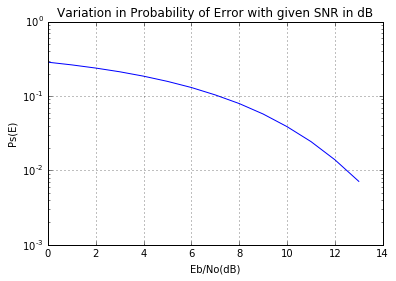

In [5]:
# File PsEsim_x01.py
# Simulation of probability of symbol error Ps(E) for 
# data transmission using uncoded PAM 
# ***** Parameters ***** 
Fs = 1000                                                    # Sampling rate 
FB = 100                                                     # Baud rate FB 
N = 1000                                                     # Number of symbols 
PsE = []                                                      # initializing Probability of error as empty array
Nerr = []                                                     # initializing no. of error bits as empty array
multiplier = 10000
EbNodB = arange(0,14,1)                                  # Specified SNR Eb/No in dB 
ptype, pparms = 'rect',[]                                # Pulse type/parameters 
an_set = [-1,+1]                                         # Set of possible an values 
M = len(an_set)                                          # Number of signal levels 

for i in range(len(EbNodB)): 
    Nerrblock = []                                  # initializing Nerr for one block as empty array for every value of EbNodB
    
    for r in range(multiplier):
        # ***** Compute Eb for given p(t) and signal constellation ***** 
        an1 = hstack((zeros(500),-3,zeros(499)))
        an2 = hstack((zeros(500),-1,zeros(499)))
        an3 = hstack((zeros(500),+1,zeros(499)))
        an4 = hstack((zeros(500),+3,zeros(499)))
        ttx1,ax1 = pamfunlab7.pam12(an1,100,1000,'rect')
        ttx2,ax2 = pamfunlab7.pam12(an2,100,1000,'rect')
        ttx3,ax3 = pamfunlab7.pam12(an3,100,1000,'rect')
        ttx4,ax4 = pamfunlab7.pam12(an4,100,1000,'rect')
        Es1 = cumsum(ax1**2.0)/float(Fs)
        Es2 = cumsum(ax2**2.0)/float(Fs)
        Es3 = cumsum(ax3**2.0)/float(Fs)
        Es4 = cumsum(ax4**2.0)/float(Fs)
        Eb = (Es1+Es2+Es3+Es4)/(4.0*log2(M))
        Eb = Eb[-1]
        #*****compute value of No*****
        EbNo = np.power(10.0,(EbNodB[i]/10))                        #linear value of SNR
        No =(Eb/EbNo)                                              #Value of No
        # ***** Generate PAM signal using random data ***** 
        dn = array(floor(2*rand(N)),int)                          # Random binary data signal 
        an = 2*dn-1                                               # Polar binary sequence 
        tt, st = pamfunlab7.pam12(an, FB, Fs, ptype, pparms)      # PAM signal 
        # ***** Generate Gaussian noise signal ***** 
        nt = randn(len(tt))                                       # Gaussian noise 
        Pnt = Fs*No/2.0 # Noise power in freq domain
        An = sqrt(Pnt)
        # >>>>> Compute An such that rt has desired SNR Eb/No <<<<< 
        rt = st + An*nt                                           # Noisy PAM signal 
        # ***** PAM signal receiver ***** 
        dly = 0 
        bn, bt, ixn = pamfunlab7.pamrcvr10(tt, rt, [FB, dly], ptype, pparms) 
        dnhat = array(zeros(len(bn)),int) 
        ix = where(bn > 0)[0] 
        dnhat[ix] = ones(len(ix))                                 # Received binary data, quantized 
        # ***** Compare dn, dnhat and compute Ps(E) ***** 
        xor = logical_xor(dn,dnhat)
        xor.astype(int)
        Nerrblock.append(cumsum(xor)[-1])
        
    Nerr.append(cumsum(Nerrblock)[-1])
    PsE.append(Nerr[i]/(N*multiplier))
    
semilogy(EbNodB,PsE)
grid()
title('Variation in Probability of Error with given SNR in dB')
xlabel('Eb/No(dB)')
ylabel('Ps(E)')

In [4]:
import ccfun

In [5]:
di = [1,0,1,1,0,0]
GD = [[1,0,1],[1,1,1]]
ci = ccfun.ccencod10(di,GD)
ci

[1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]

In [6]:
bi = [0]*len(ci)
for i in range(len(ci)):
    bi[i] = 2*ci[i] - 1

In [7]:
bi

[1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1]

In [8]:
dihat = ccfun.ccdecod20(bi,GD)

In [9]:
dihat

array([1, 0, 1, 1, 0, 0])

# Here we can see that dihat = di which proves that general decoder is working correctly.

In [16]:
Fs = 1000                                                    # Sampling rate 
FB = 100                                                     # Baud rate FB 
N = 1000                                                     # Number of symbols 
PsE = []                                                      # initializing Probability of error as empty array
Nerr = []                                                     # initializing no. of error bits as empty array
multiplier = 1000
EbNodB = arange(0,10,2)                                  # Specified SNR Eb/No in dB 
ptype, pparms = 'rect',[]                                # Pulse type/parameters 
an_set = [-1,+1]                                         # Set of possible an values 
M = len(an_set)                                          # Number of signal levels 

for i in range(len(EbNodB)): 
    Nerrblock = []                                  # initializing Nerr for one block as empty array for every value of EbNodB
    
    for r in range(multiplier):
        # ***** Compute Eb for given p(t) and signal constellation ***** 
        an1 = hstack((zeros(500),1,zeros(499)))
        an2 = hstack((zeros(500),-1,zeros(499)))
        ttx1,ax1 = pamfunlab7.pam12(an1,100,1000,'rect')
        ttx2,ax2 = pamfunlab7.pam12(an2,100,1000,'rect')
        Es1 = cumsum(ax1**2.0)/float(Fs)
        Es2 = cumsum(ax2**2.0)/float(Fs)
        Eb = (Es1+ Es2)/(2.0*log2(M))
        Eb = Eb[-1]
        #*****compute value of No*****
        EbNo = np.power(10.0,(EbNodB[i]/10))                        #linear value of SNR
        No =(Eb/EbNo)                                              #Value of No
        # ***** Generate PAM signal using random data ***** 
        dn = array(floor(2*rand(N)),int)                          # Random binary data signal 
        dnci = ccfun.ccencod10(dn,[[1,0],[1,1]])
        dnci = reshape(dnci,len(dnci))
        an = [0]*len(dnci)
        for zz in range(len(dnci)):
            an[zz] = 2*dnci[zz]-1                                               # Polar binary sequence 
        tt, st = pamfunlab7.pam12(an, FB, Fs, ptype, pparms)      # PAM signal 
        # ***** Generate Gaussian noise signal ***** 
        nt = randn(len(tt))                                       # Gaussian noise 
        Pnt = Fs*No/2.0 # Noise power in freq domain
        An = sqrt(Pnt)
        # >>>>> Compute An such that rt has desired SNR Eb/No <<<<< 
        rt = st + An*nt                                           # Noisy PAM signal 
        # ***** PAM signal receiver ***** 
        dly = 0 
        bn, bt, ixn = pamfunlab7.pamrcvr10(tt, rt, [FB, dly], ptype, pparms) 
        dnhat = array(zeros(len(bn)),int) 
        ix = where(bn > 0)[0] 
        dnhat[ix] = ones(len(ix))                                 # Received binary data, quantized 
        dnhatdi,DM = ccfun.ccdecod10(dnhat)
        # ***** Compare dn, dnhat and compute Ps(E) ***** 
        xor = logical_xor(dn,dnhatdi)
        xor.astype(int)
        Nerrblock.append(cumsum(xor)[-1])
        
    Nerr.append(cumsum(Nerrblock)[-1])
    PsE.append(Nerr[i]/(N*multiplier))
    
semilogy(EbNodB,PsE)
grid()
title('Variation in Probability of Error with given SNR in dB')
xlabel('Eb/No(dB)')
ylabel('Ps(E)')


In [55]:
import wavfun as wf
import ascfun as af
rt,Fs = wf.wavread('pamsig702.wav')
tt = arange(len(rt))/float(Fs)

In [56]:
bn,bt,ixn = pamfunlab7.pamrcvr10(tt,rt,[175,0],'rect')
bn

array([-0.03276884, -0.0230448 , -0.04158506, ...,  0.05944958,
        0.05084866,  0.00457227])

In [57]:
GD = [[1,0,1],[1,1,1]]
dihat = ccfun.ccdecod20(bn,GD)

In [58]:
dihat

array([0, 0, 0, ..., 1, 0, 0])

In [59]:
txthat = af.bin2asc(dihat,8) # converting input sequence into output text

print(txthat) # Printing result

Hewlett-Packard, which started out as a manufacturez of test equipment, 
was founded in 1938 in a garage in the Californian town of Palo Alto.


# The required message was decoded successfully.